In [1]:
#Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# DataSet 1

In [3]:
#Importing DataSet1

In [4]:
df1=pd.read_csv("Daily_Power_Gen_Source_march_23.csv")

In [5]:
df1.head()

,source,NR,WR,SR,ER,NER,All India,date
0,Hydro,139.0,43.0,72.0,30.0,7.0,292,31-03-2013
1,Total,675.0,820.0,697.0,306.0,28.0,2526,31-03-2013
2,Wind Gen(MU),2.0,19.0,13.0,0.0,0.0,34,31-03-2013
3,Hydro,137.0,43.0,83.0,32.0,5.0,300,01-04-2013
4,Total,683.0,841.0,706.0,316.0,29.0,2575,01-04-2013


In [6]:
#for finding numbers of rows and columns 
print(df1.shape)

(18251, 8)


In [7]:
#removing all rows having 'Total' in 'source' column as total indicates the total energy
df1_source= df1.drop(df1[df1['source'] == 'Total'].index)

In [8]:
df1_source.head()

,source,NR,WR,SR,ER,NER,All India,date
0,Hydro,139.0,43.0,72.0,30.0,7.0,292,31-03-2013
2,Wind Gen(MU),2.0,19.0,13.0,0.0,0.0,34,31-03-2013
3,Hydro,137.0,43.0,83.0,32.0,5.0,300,01-04-2013
5,Wind Gen(MU),7.0,21.0,19.0,0.0,0.0,48,01-04-2013
6,Wind Gen(MU),8.0,25.0,15.0,0.0,0.0,48,02-04-2013


In [9]:
df_total=df1[df1['source'] == 'Total']

In [10]:
df_total.head()

,source,NR,WR,SR,ER,NER,All India,date
1,Total,675.0,820.0,697.0,306.0,28.0,2526,31-03-2013
4,Total,683.0,841.0,706.0,316.0,29.0,2575,01-04-2013
7,Total,675.0,836.0,709.0,311.0,28.0,2558,02-04-2013
9,Total,676.0,835.0,705.0,307.0,28.0,2551,03-04-2013
12,Total,691.0,856.0,711.0,302.0,26.0,2586,04-04-2013


In [11]:
df1_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14822 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     14822 non-null  object 
 1   NR         14822 non-null  float64
 2   WR         14822 non-null  float64
 3   SR         14822 non-null  float64
 4   ER         14822 non-null  float64
 5   NER        14822 non-null  float64
 6   All India  14822 non-null  int64  
 7   date       14822 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.0+ MB


In [12]:
df1_source.isnull().sum()

source       0
NR           0
WR           0
SR           0
ER           0
NER          0
All India    0
date         0
dtype: int64

In [13]:
#from o/p it is clear that there are no null values in df1

In [14]:
#checking for duplicate values

In [15]:
df1_source.duplicated().any()

False

In [16]:
#extracting day , month and year from date object from df1:

In [17]:
df1_source['date'] = pd.to_datetime(df1['date'])
df1_source['day'] = df1_source['date'].dt.day
df1_source['month'] = df1_source['date'].dt.month
df1_source['year'] = df1_source['date'].dt.year

C:\Users\raaje\AppData\Local\Temp\ipykernel_18084\1897160475.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1_source['date'] = pd.to_datetime(df1['date'])


In [18]:
df1_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14822 entries, 0 to 18249
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source     14822 non-null  object        
 1   NR         14822 non-null  float64       
 2   WR         14822 non-null  float64       
 3   SR         14822 non-null  float64       
 4   ER         14822 non-null  float64       
 5   NER        14822 non-null  float64       
 6   All India  14822 non-null  int64         
 7   date       14822 non-null  datetime64[ns]
 8   day        14822 non-null  int64         
 9   month      14822 non-null  int64         
 10  year       14822 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 1.4+ MB


In [19]:
df1_source.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
0,Hydro,139.0,43.0,72.0,30.0,7.0,292,2013-03-31,31,3,2013
2,Wind Gen(MU),2.0,19.0,13.0,0.0,0.0,34,2013-03-31,31,3,2013
3,Hydro,137.0,43.0,83.0,32.0,5.0,300,2013-01-04,4,1,2013
5,Wind Gen(MU),7.0,21.0,19.0,0.0,0.0,48,2013-01-04,4,1,2013
6,Wind Gen(MU),8.0,25.0,15.0,0.0,0.0,48,2013-02-04,4,2,2013


#DataSet2 

In [20]:
df2=pd.read_csv("Daily_Power_Gen_States_march_23.csv")

In [21]:
df2.head()

,Region,States,Max.Demand Met during the day(MW),Shortage during maximum Demand(MW),Energy Met (MU),date
0,NER,Mizoram,77,1.0,1.2,01-01-2015
1,WR,DD,214,0.0,4.8,01-01-2015
2,WR,Goa,383,0.0,7.3,01-01-2015
3,WR,Maharashtra,14837,57.0,315.0,01-01-2015
4,WR,MP,5740,0.0,109.8,01-01-2015


In [22]:
print(df2.shape)

(126699, 6)


In [23]:
df2.head()

,Region,States,Max.Demand Met during the day(MW),Shortage during maximum Demand(MW),Energy Met (MU),date
0,NER,Mizoram,77,1.0,1.2,01-01-2015
1,WR,DD,214,0.0,4.8,01-01-2015
2,WR,Goa,383,0.0,7.3,01-01-2015
3,WR,Maharashtra,14837,57.0,315.0,01-01-2015
4,WR,MP,5740,0.0,109.8,01-01-2015


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126699 entries, 0 to 126698
Data columns (total 6 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Region                              126699 non-null  object 
 1   States                              126699 non-null  object 
 2   Max.Demand Met during the day(MW)   126699 non-null  int64  
 3   Shortage during maximum Demand(MW)  126680 non-null  float64
 4   Energy Met (MU)                     126698 non-null  float64
 5   date                                126699 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.8+ MB


In [25]:
#few null values are found

In [26]:
df2.isnull().sum()

Region                                 0
States                                 0
Max.Demand Met during the day(MW)      0
Shortage during maximum Demand(MW)    19
Energy Met (MU)                        1
date                                   0
dtype: int64

In [27]:
#from o/p it is clear that there are 19 null values in column  Shortage during maximum Demand(MW) of df2

In [28]:
df2['Shortage during maximum Demand(MW)'] = df2['Shortage during maximum Demand(MW)'].fillna(df2['Shortage during maximum Demand(MW)'].mean())

In [29]:
df2['Energy Met (MU)'] = df2['Energy Met (MU)'].fillna(0)

In [30]:
df2.isnull().sum()

Region                                0
States                                0
Max.Demand Met during the day(MW)     0
Shortage during maximum Demand(MW)    0
Energy Met (MU)                       0
date                                  0
dtype: int64

In [31]:
#null values of shortage during maximum demand with mean and Energy Met with zeros are replaced 

In [32]:
df2.duplicated().any()

False

In [33]:
#for df2 to create date day month and year
df2['date'] = pd.to_datetime(df2['date'])
df2['day'] = df2['date'].dt.day
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

C:\Users\raaje\AppData\Local\Temp\ipykernel_18084\278674350.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['date'] = pd.to_datetime(df2['date'])


In [34]:
df2.head()

,Region,States,Max.Demand Met during the day(MW),Shortage during maximum Demand(MW),Energy Met (MU),date,day,month,year
0,NER,Mizoram,77,1.0,1.2,2015-01-01,1,1,2015
1,WR,DD,214,0.0,4.8,2015-01-01,1,1,2015
2,WR,Goa,383,0.0,7.3,2015-01-01,1,1,2015
3,WR,Maharashtra,14837,57.0,315.0,2015-01-01,1,1,2015
4,WR,MP,5740,0.0,109.8,2015-01-01,1,1,2015


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126699 entries, 0 to 126698
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Region                              126699 non-null  object        
 1   States                              126699 non-null  object        
 2   Max.Demand Met during the day(MW)   126699 non-null  int64         
 3   Shortage during maximum Demand(MW)  126699 non-null  float64       
 4   Energy Met (MU)                     126699 non-null  float64       
 5   date                                126699 non-null  datetime64[ns]
 6   day                                 126699 non-null  int64         
 7   month                               126699 non-null  int64         
 8   year                                126699 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 8.7+ MB


In [36]:
#df2['Energy Met (MU)']=df2['Energy Met (MU)']*1000
df2.rename(columns={'Energy Met (MU)': 'Energy Met (MW)'}, inplace=True)
df2['Energy Met (MW)']=df2['Energy Met (MW)']*1000

In [37]:
df2.head()

,Region,States,Max.Demand Met during the day(MW),Shortage during maximum Demand(MW),Energy Met (MW),date,day,month,year
0,NER,Mizoram,77,1.0,1200.0,2015-01-01,1,1,2015
1,WR,DD,214,0.0,4800.0,2015-01-01,1,1,2015
2,WR,Goa,383,0.0,7300.0,2015-01-01,1,1,2015
3,WR,Maharashtra,14837,57.0,315000.0,2015-01-01,1,1,2015
4,WR,MP,5740,0.0,109800.0,2015-01-01,1,1,2015


# Exploratory Data Analysis

In [38]:
df1_source.describe()

,NR,WR,SR,ER,NER,All India,day,month,year
count,14822.000000,14822.000000,14822.000000,14822.000000,14822.000000,14822.000000,14822.000000,14822.000000,14822.000000
mean,144.294559,192.747309,129.275448,77.964625,8.239123,552.463838,15.758872,6.516057,2018.888477
std,188.317055,385.111533,160.078391,161.101873,10.276652,867.984287,8.789566,3.493926,2.613752
min,-2.940000,0.000000,2.000000,0.000000,0.000000,13.000000,1.000000,1.000000,2013.000000
25%,23.000000,21.000000,33.000000,0.000000,0.000000,94.000000,8.000000,3.000000,2017.000000
50%,43.000000,38.000000,63.000000,1.000000,2.000000,208.000000,16.000000,7.000000,2019.000000
75%,176.000000,82.000000,147.000000,51.000000,15.000000,453.000000,23.000000,10.000000,2021.000000
max,829.000000,1565.000000,745.000000,743.000000,52.000000,3695.000000,31.000000,12.000000,2023.000000


In [39]:
df1_source1=df1_source.copy()
print(df1_source1.columns)

Index(['source', 'NR', 'WR', 'SR', 'ER', 'NER', 'All India', 'date', 'day',
       'month', 'year'],
      dtype='object')


In [40]:
# To observe the energy consumption over period of time

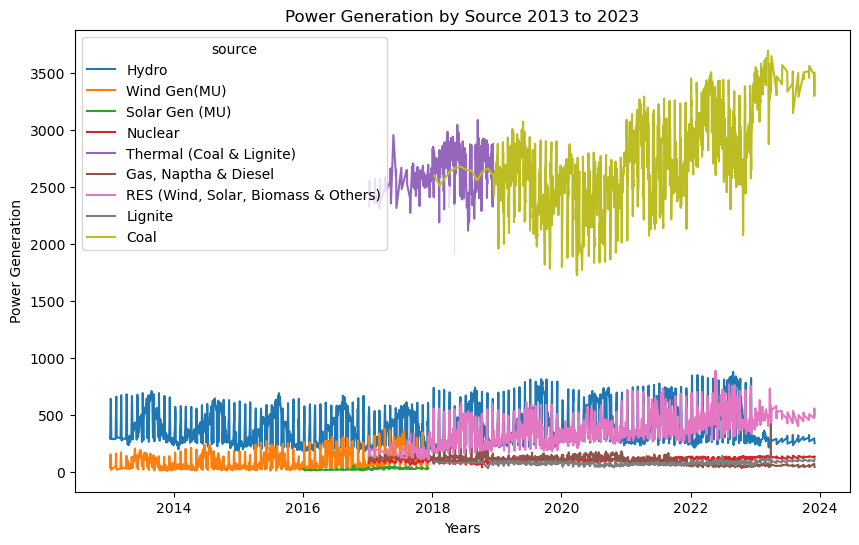

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
0,Hydro,139.0,43.0,72.0,30.0,7.0,292,2013-03-31,31,3,2013
2,Wind Gen(MU),2.0,19.0,13.0,0.0,0.0,34,2013-03-31,31,3,2013
3,Hydro,137.0,43.0,83.0,32.0,5.0,300,2013-01-04,4,1,2013
5,Wind Gen(MU),7.0,21.0,19.0,0.0,0.0,48,2013-01-04,4,1,2013
6,Wind Gen(MU),8.0,25.0,15.0,0.0,0.0,48,2013-02-04,4,2,2013


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1_source1, x='date', y='All India', hue='source')
plt.title('Power Generation by Source 2013 to 2023')
plt.xlabel('Years')
plt.ylabel('Power Generation')
plt.show()
df1_source.head()

In [42]:
#Power Generation by different sources

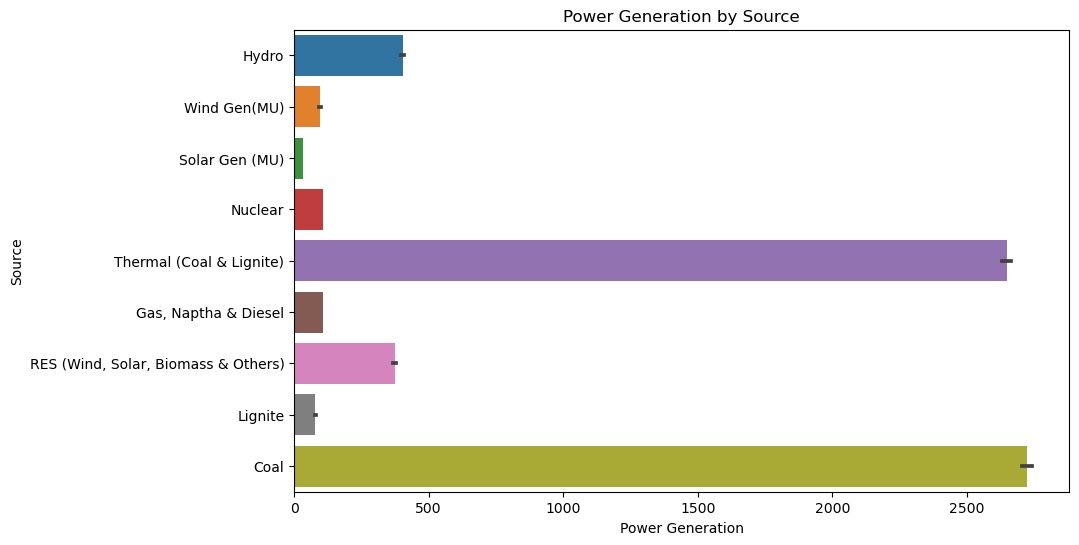

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1_source1, y='source', x='All India')
plt.title('Power Generation by Source')
plt.ylabel('Source')
plt.xlabel('Power Generation')
plt.show()

In [44]:
#Renewable and Non-Renewable Sources of Power Generation¶

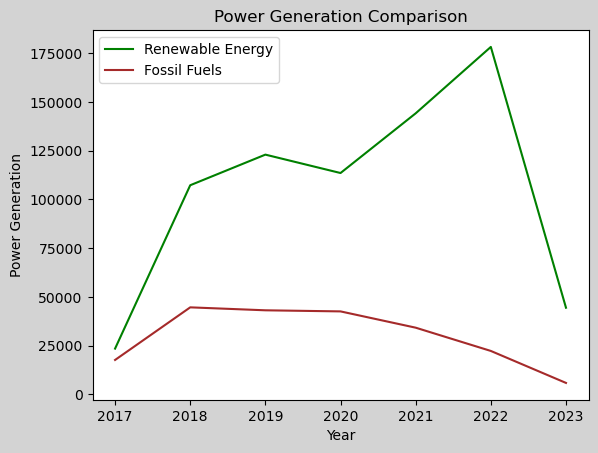

In [45]:
import warnings

# Ignore warning messages
warnings.filterwarnings("ignore")

#df1=pd.read_csv("Daily_Power_Gen_Source_march_23.csv")


#df1_source= df1.drop(df1[df1['source'] == 'Total'].index)

res_data = df1_source[df1_source['source'].str.startswith('RES')]
res_data['date'] = res_data['date'].astype(str)
res_data = res_data.groupby(res_data['date'].str.split('-').str[0])['All India'].sum().reset_index()

gas_data = df1_source[df1_source['source'].str.startswith('Gas')]
gas_data['date'] = gas_data['date'].astype(str)
gas_data = gas_data.groupby(gas_data['date'].str.split('-').str[0])['All India'].sum().reset_index()

combined_data = res_data.merge(gas_data, on='date')
combined_data.columns = ['Year', 'Renewable Energy', 'Fossil Fuels']

sns.lineplot(data=combined_data, x='Year', y='Renewable Energy', label='Renewable Energy',color="green")
sns.lineplot(data=combined_data, x='Year', y='Fossil Fuels', label='Fossil Fuels',color="brown")

plt.xlabel('Year')
plt.ylabel('Power Generation')
plt.title('Power Generation Comparison')
plt.legend()

fig = plt.gcf()
fig.set_facecolor('lightgray') 

plt.show()

In [46]:
#Regression Model

In [47]:
#df2.head()
# Convert the date column to a datetime format and set it as the index



# Calculate the correlation matrix
corr_matrix = df2.corr()

# Print the correlation matrix
print(corr_matrix)

                                    Max.Demand Met during the day(MW)  \
Max.Demand Met during the day(MW)                            1.000000   
Shortage during maximum Demand(MW)                           0.153828   
Energy Met (MW)                                              0.992308   
day                                                         -0.001823   
month                                                       -0.008382   
year                                                         0.116664   

                                    Shortage during maximum Demand(MW)  \
Max.Demand Met during the day(MW)                             0.153828   
Shortage during maximum Demand(MW)                            1.000000   
Energy Met (MW)                                               0.168921   
day                                                          -0.000945   
month                                                         0.002991   
year                                        

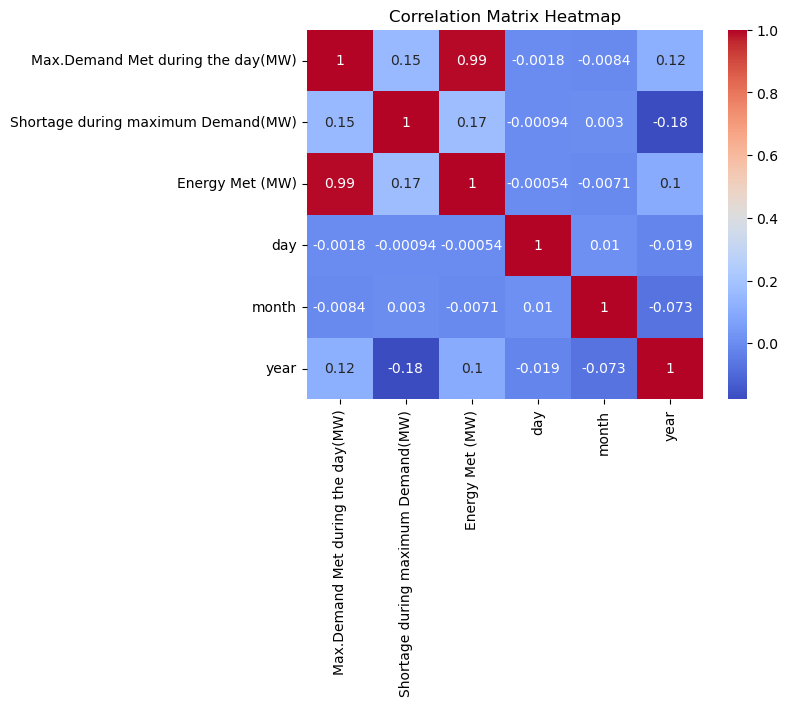

In [48]:
# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

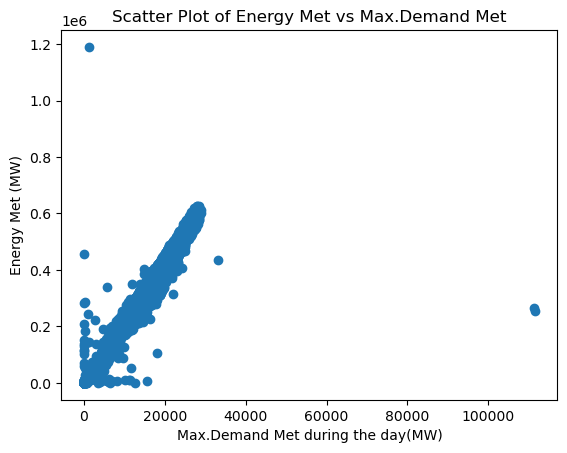

In [49]:
# scatter plot between X(Max.Demand Met during the day(MW)) and Y(Energy Met (MW))
# X-> Max.Demand Met during the day(MW) -> independent var
# Y -> Energy Met (MW) -> dependent var

plt.scatter(df2['Max.Demand Met during the day(MW)'], df2['Energy Met (MW)'])
plt.xlabel('Max.Demand Met during the day(MW)')
plt.ylabel('Energy Met (MW)')
plt.title('Scatter Plot of Energy Met vs Max.Demand Met')
plt.show()

In [50]:
%%html
<div class='tableauPlaceholder' id='viz1689579086527' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_16895978252330&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book1_16895978252330&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_16895978252330&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1689579086527');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1920px';vizElement.style.height='1107px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1920px';vizElement.style.height='1107px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';vizElement.parentNode.insertBefore(scriptElement, vizElement); 

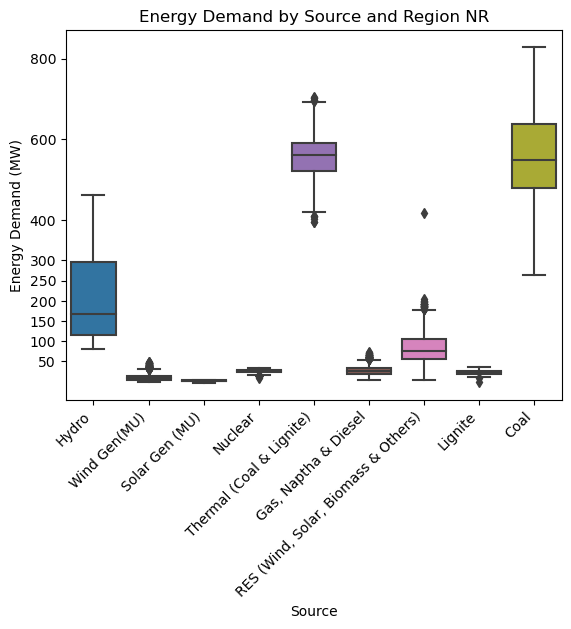

In [51]:
# Create a box plot of energy demand by source and region NR
sns.boxplot(x='source', y='NR', data=df1_source)
plt.xlabel('Source')
plt.ylabel('Energy Demand (MW)')
plt.title('Energy Demand by Source and Region NR')
plt.yticks([50,100,150,200,250,300,400,600,800])
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
# Load the data
data_path = 'Daily_Power_Gen_Source_march_23.csv'  # Adjust this to the path of your dataset
data = pd.read_csv(data_path, parse_dates=['date'], index_col='date')

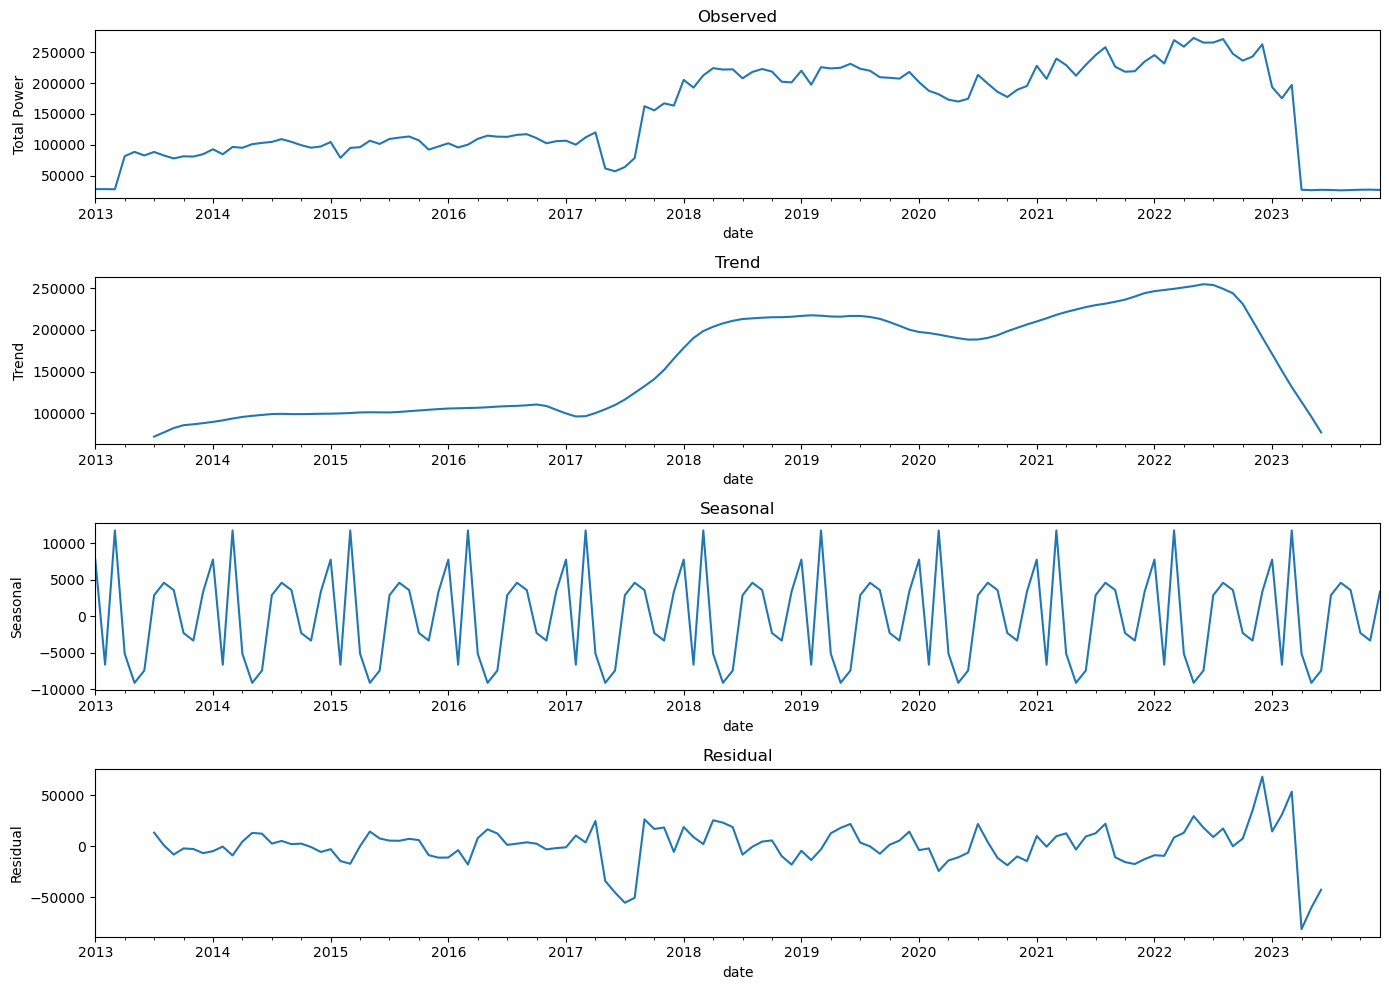

In [54]:
# Resampling the data to a consistent time frequency (e.g., daily, monthly)
# Assuming daily data is complete; otherwise consider resampling to a monthly level if there are gaps or inconsistencies
data_monthly = data.resample('M').sum()  # Change to 'M' for monthly sums, if daily data has gaps

# Decomposing the 'All India' column
result = seasonal_decompose(data_monthly['All India'], model='additive')  # Change to 'multiplicative' if that fits the data characteristics better

# Plotting the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
ax1.set_ylabel('Total Power')
ax2.set_ylabel('Trend')
ax3.set_ylabel('Seasonal')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [55]:
df1_source_grouped = df1_source.groupby('source')['All India'].sum()
df1_source_grouped.head()

source
Coal                    4137214
Gas, Naptha & Diesel     210227
Hydro                   1429124
Lignite                  119809
Nuclear                  209917
Name: All India, dtype: int64

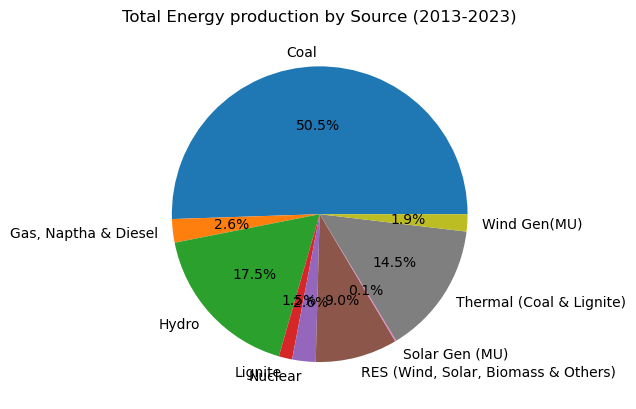

In [56]:
# Plot the pie chart
plt.pie(df1_source_grouped, labels=df1_source_grouped.index, autopct='%1.1f%%')
plt.title('Total Energy production by Source (2013-2023)')
plt.show()

In [57]:
print(df1_source['source'].unique())
print(df1_source['source'].nunique())
df1_source.head()

['Hydro' 'Wind Gen(MU)' 'Solar Gen (MU)' 'Nuclear'
 'Thermal (Coal & Lignite)' 'Gas, Naptha & Diesel'
 'RES (Wind, Solar, Biomass & Others)' 'Lignite' 'Coal']
9


,source,NR,WR,SR,ER,NER,All India,date,day,month,year
0,Hydro,139.0,43.0,72.0,30.0,7.0,292,2013-03-31,31,3,2013
2,Wind Gen(MU),2.0,19.0,13.0,0.0,0.0,34,2013-03-31,31,3,2013
3,Hydro,137.0,43.0,83.0,32.0,5.0,300,2013-01-04,4,1,2013
5,Wind Gen(MU),7.0,21.0,19.0,0.0,0.0,48,2013-01-04,4,1,2013
6,Wind Gen(MU),8.0,25.0,15.0,0.0,0.0,48,2013-02-04,4,2,2013


In [58]:
df1_source_hydro=df1_source.query('source == "Hydro"')
df1_source_hydro.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
0,Hydro,139.0,43.0,72.0,30.0,7.0,292,2013-03-31,31,3,2013
3,Hydro,137.0,43.0,83.0,32.0,5.0,300,2013-01-04,4,1,2013
8,Hydro,136.0,42.0,79.0,29.0,4.0,290,2013-02-04,4,2,2013
10,Hydro,135.0,42.0,80.0,38.0,4.0,299,2013-03-04,4,3,2013
13,Hydro,133.0,44.0,78.0,38.0,5.0,297,2013-04-04,4,4,2013


In [59]:
df1_source_hydro_grp = df1_source_hydro.groupby('year')['All India'].sum()
df1_source_hydro_grp.head()

year
2013    112288
2014    136047
2015    129344
2016    128054
2017    132676
Name: All India, dtype: int64

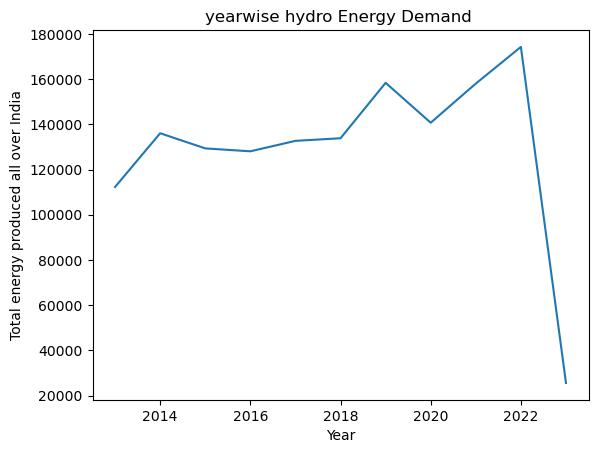

In [60]:
# Create a line plot of energy demand by source
df1_source_hydro_grp.plot()
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise hydro Energy Demand ')
plt.show()

In [61]:
df1_source_Wind=df1_source.query('source == "Wind Gen(MU)"')
df1_source_Wind.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
2,Wind Gen(MU),2.0,19.0,13.0,0.0,0.0,34,2013-03-31,31,3,2013
5,Wind Gen(MU),7.0,21.0,19.0,0.0,0.0,48,2013-01-04,4,1,2013
6,Wind Gen(MU),8.0,25.0,15.0,0.0,0.0,48,2013-02-04,4,2,2013
11,Wind Gen(MU),3.0,22.0,6.0,0.0,0.0,31,2013-03-04,4,3,2013
14,Wind Gen(MU),3.0,23.0,15.0,0.0,0.0,42,2013-04-04,4,4,2013


In [62]:
df1_source_Wind_grp = df1_source_Wind.groupby('year')['All India'].sum()
df1_source_Wind_grp.head()

year
2013    22089
2014    27935
2015    27856
2016    39161
2017    36795
Name: All India, dtype: int64

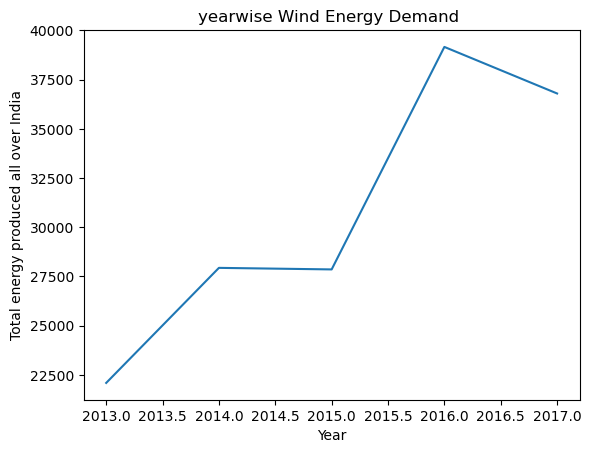

In [63]:
# Create a line plot of energy demand by source
df1_source_Wind_grp.plot()
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise Wind Energy Demand ')
plt.show()

In [64]:
df1_source_Solar=df1_source.query('source == "Solar Gen (MU)"')
df1_source_Solar.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
2937,Solar Gen (MU),1.99,9.65,16.0,0.03,0.02,28,2016-01-01,1,1,2016
3737,Solar Gen (MU),3.01,10.79,9.4,0.04,0.03,23,2016-09-27,27,9,2016
3743,Solar Gen (MU),3.43,10.64,8.4,0.00,0.01,22,2016-09-28,28,9,2016
3747,Solar Gen (MU),0.47,11.19,8.5,0.00,0.02,20,2016-09-29,29,9,2016
3751,Solar Gen (MU),0.35,9.67,9.4,0.00,0.02,19,2016-09-30,30,9,2016


In [65]:
df1_source_Solar_grp = df1_source_Solar.groupby('year')['All India'].sum()
df1_source_Solar_grp.head()

year
2016    2408
2017    8278
Name: All India, dtype: int64

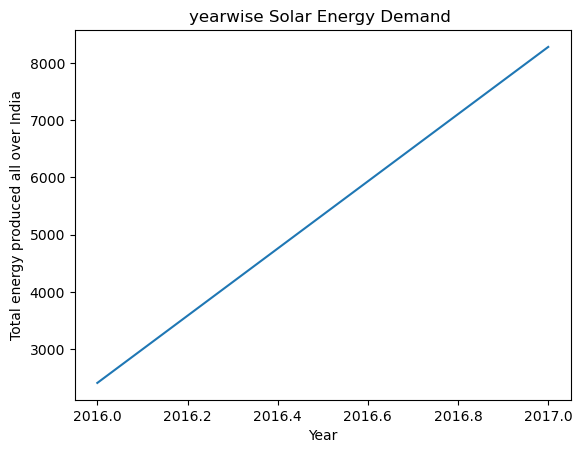

In [66]:
# Create a line plot of energy demand by source
plt.plot(df1_source_Solar_grp.index,df1_source_Solar_grp)
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise Solar Energy Demand ')
plt.show()

In [67]:
df1_source_Nuclear=df1_source.query('source == "Nuclear"')
df1_source_Nuclear.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
4662,Nuclear,26.0,17.0,40.0,0.0,0.0,84,2017-05-26,26,5,2017
4945,Nuclear,32.0,2.0,28.0,0.0,0.0,62,2017-08-28,28,8,2017
4954,Nuclear,32.0,3.0,30.0,0.0,0.0,65,2017-08-29,29,8,2017
4958,Nuclear,32.0,3.0,35.0,0.0,0.0,70,2017-08-30,30,8,2017
4967,Nuclear,33.0,3.0,42.0,0.0,0.0,79,2017-08-31,31,8,2017


In [68]:
df1_source_Nuclear_grp = df1_source_Nuclear.groupby('year')['All India'].sum()
df1_source_Nuclear_grp.head()

year
2017    12131
2018    33283
2019    36918
2020    34377
2021    38268
Name: All India, dtype: int64

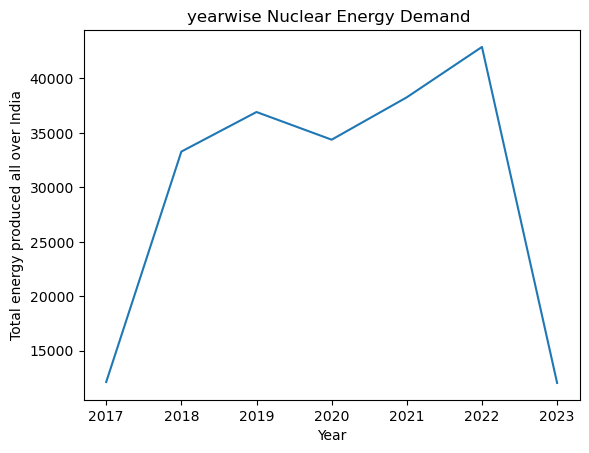

In [69]:
# Create a line plot of energy demand by source
df1_source_Nuclear_grp.plot()
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise Nuclear Energy Demand ')
plt.show()

In [70]:
df1_source_Thermal=df1_source.query('source == "Thermal (Coal & Lignite)"')
df1_source_Thermal.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
4664,Thermal (Coal & Lignite),645.0,1232.0,622.0,448.0,9.0,2956,2017-05-26,26,5,2017
4949,Thermal (Coal & Lignite),536.0,1033.0,452.0,378.0,4.0,2402,2017-08-28,28,8,2017
4950,Thermal (Coal & Lignite),511.0,950.0,434.0,373.0,4.0,2273,2017-08-29,29,8,2017
4956,Thermal (Coal & Lignite),515.0,933.0,472.0,381.0,5.0,2304,2017-08-30,30,8,2017
4966,Thermal (Coal & Lignite),489.0,973.0,544.0,378.0,5.0,2389,2017-08-31,31,8,2017


In [71]:
df1_source_Thermal_grp = df1_source_Thermal.groupby('year')['All India'].sum()
df1_source_Thermal_grp.head()

year
2017    313624
2018    869991
Name: All India, dtype: int64

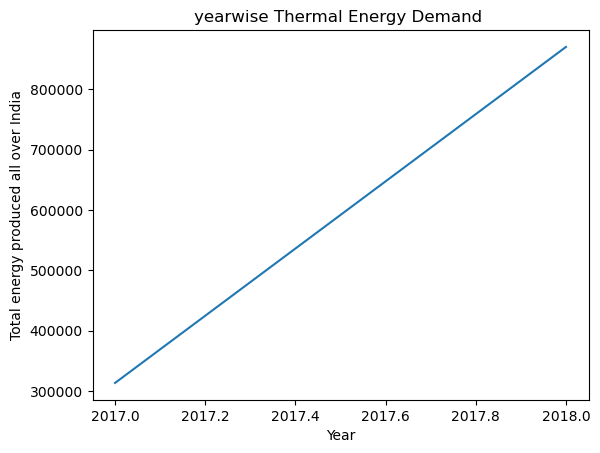

In [72]:
# Create a line plot of energy demand by source
plt.plot(df1_source_Thermal_grp.index,df1_source_Thermal_grp)
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise Thermal Energy Demand ')
plt.show()

In [73]:
df1_source_NDG=df1_source.query('source == "Gas, Naptha & Diesel"')
df1_source_NDG.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
4667,"Gas, Naptha & Diesel",37.0,49.0,19.0,0.0,22.0,127,2017-05-26,26,5,2017
4944,"Gas, Naptha & Diesel",39.0,46.0,15.0,0.0,12.0,112,2017-08-28,28,8,2017
4953,"Gas, Naptha & Diesel",44.0,44.0,15.0,0.0,12.0,115,2017-08-29,29,8,2017
4959,"Gas, Naptha & Diesel",36.0,43.0,15.0,0.0,12.0,107,2017-08-30,30,8,2017
4964,"Gas, Naptha & Diesel",38.0,47.0,15.0,0.0,11.0,111,2017-08-31,31,8,2017


In [74]:
df1_source_NDG_grp = df1_source_NDG.groupby('year')['All India'].sum()
df1_source_NDG_grp.head()

year
2017    17633
2018    44628
2019    43112
2020    42551
2021    34195
Name: All India, dtype: int64

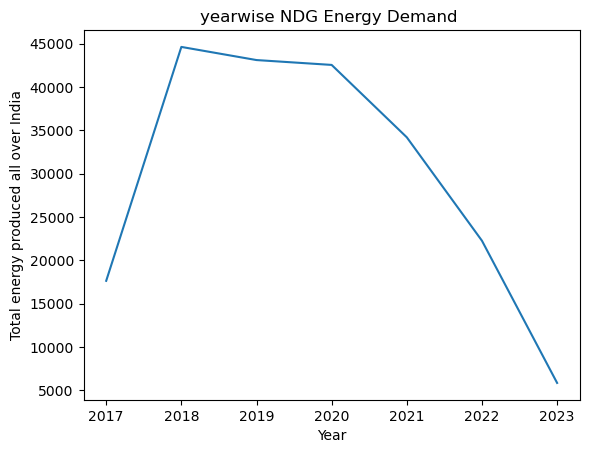

In [75]:
# Create a line plot of energy demand by source
df1_source_NDG_grp.plot()
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise NDG Energy Demand ')
plt.show()

In [76]:
df1_source_RES=df1_source.query('source == "RES (Wind, Solar, Biomass & Others)"')
df1_source_RES.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
4668,"RES (Wind, Solar, Biomass & Others)",40.0,110.0,111.0,1.0,0.0,263,2017-05-26,26,5,2017
4948,"RES (Wind, Solar, Biomass & Others)",19.0,63.0,219.0,2.0,0.0,303,2017-08-28,28,8,2017
4952,"RES (Wind, Solar, Biomass & Others)",34.0,78.0,225.0,1.0,0.0,339,2017-08-29,29,8,2017
4960,"RES (Wind, Solar, Biomass & Others)",38.0,88.0,205.0,1.0,0.0,332,2017-08-30,30,8,2017
4963,"RES (Wind, Solar, Biomass & Others)",25.0,98.0,133.0,1.0,0.0,257,2017-08-31,31,8,2017


In [77]:
df1_source_RES_grp = df1_source_RES.groupby('year')['All India'].sum()
df1_source_RES_grp.head()

year
2017     23460
2018    107288
2019    122996
2020    113554
2021    144189
Name: All India, dtype: int64

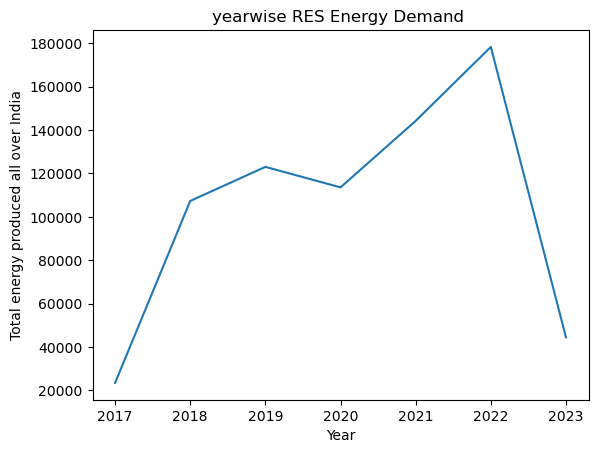

In [78]:
# Create a line plot of energy demand by source
df1_source_RES_grp.plot()
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise RES Energy Demand ')
plt.show()

In [79]:
df1_source_Lignite=df1_source.query('source == "Lignite"')
df1_source_Lignite.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
7620,Lignite,23.0,16.0,58.0,0.0,0.0,97,2018-11-29,29,11,2018
7629,Lignite,24.0,16.0,54.0,0.0,0.0,93,2018-11-30,30,11,2018
7635,Lignite,23.0,16.0,55.0,0.0,0.0,94,2018-01-12,12,1,2018
7642,Lignite,21.0,16.0,50.0,0.0,0.0,86,2018-02-12,12,2,2018
7652,Lignite,21.0,15.0,51.0,0.0,0.0,87,2018-03-12,12,3,2018


In [80]:
df1_source_Lignite_grp = df1_source_Lignite.groupby('year')['All India'].sum()
df1_source_Lignite_grp.head()

year
2018     2751
2019    29075
2020    22190
2021    25956
2022    30519
Name: All India, dtype: int64

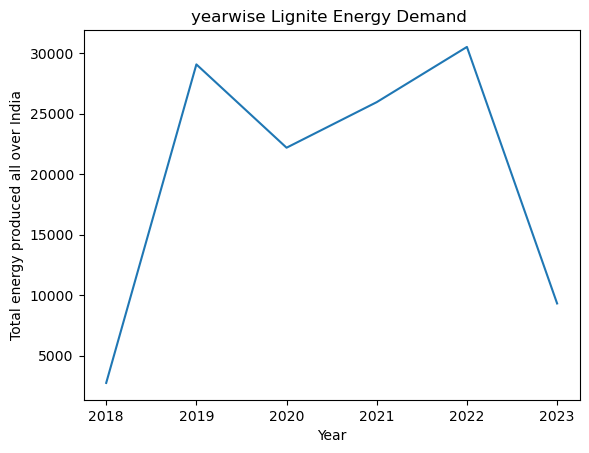

In [81]:
# Create a line plot of energy demand by source
df1_source_Lignite_grp.plot()
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise Lignite Energy Demand ')
plt.show()

In [82]:
df1_source_Coal=df1_source.query('source == "Coal"')
df1_source_Coal.head()

,source,NR,WR,SR,ER,NER,All India,date,day,month,year
7621,Coal,528.0,1190.0,493.0,409.0,10.0,2631,2018-11-29,29,11,2018
7627,Coal,531.0,1172.0,496.0,408.0,10.0,2615,2018-11-30,30,11,2018
7634,Coal,515.0,1183.0,484.0,409.0,10.0,2600,2018-01-12,12,1,2018
7641,Coal,475.0,1172.0,452.0,406.0,7.0,2511,2018-02-12,12,2,2018
7653,Coal,503.0,1189.0,476.0,405.0,4.0,2576,2018-03-12,12,3,2018


In [83]:
df1_source_Coal_grp = df1_source_Coal.groupby('year')['All India'].sum()
df1_source_Coal_grp.head()

year
2018      83042
2019     914526
2020     771398
2021     973322
2022    1087498
Name: All India, dtype: int64

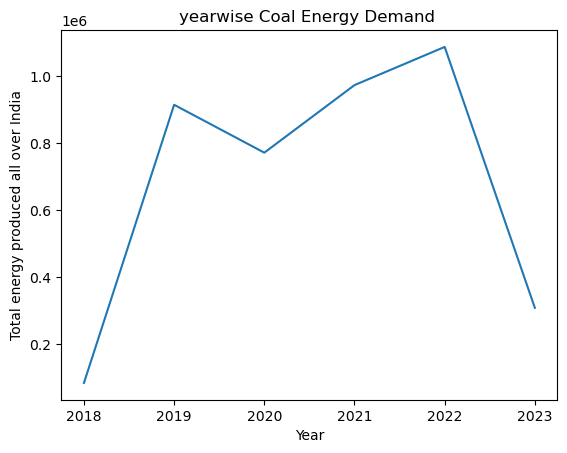

In [84]:
# Create a line plot of energy demand by source
df1_source_Coal_grp.plot()
plt.xlabel('Year')
plt.ylabel('Total energy produced all over India')
plt.title('yearwise Coal Energy Demand ')
plt.yticks([200000, 400000, 600000, 800000, 1000000])
plt.show()

# Dataset 2

In [85]:
df2.head()

,Region,States,Max.Demand Met during the day(MW),Shortage during maximum Demand(MW),Energy Met (MW),date,day,month,year
0,NER,Mizoram,77,1.0,1200.0,2015-01-01,1,1,2015
1,WR,DD,214,0.0,4800.0,2015-01-01,1,1,2015
2,WR,Goa,383,0.0,7300.0,2015-01-01,1,1,2015
3,WR,Maharashtra,14837,57.0,315000.0,2015-01-01,1,1,2015
4,WR,MP,5740,0.0,109800.0,2015-01-01,1,1,2015


In [86]:
#Region wise Nation wise Power Distribution In India

In [87]:
df_grouped = df2.groupby('Region')['Max.Demand Met during the day(MW)'].max()
print(df_grouped)

Region
ER       9989
NER      2376
NR      33137
SR      18048
WR     111539
Name: Max.Demand Met during the day(MW), dtype: int64


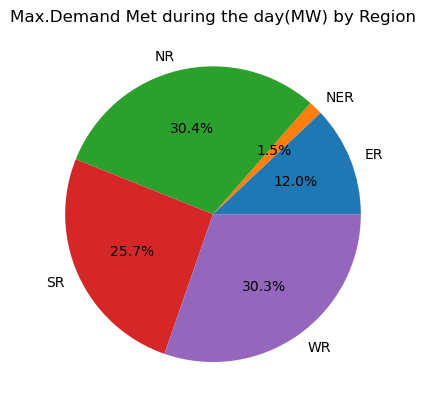

In [88]:
df_grouped = df2.groupby('Region')['Max.Demand Met during the day(MW)'].sum()

# Plot the pie chart
plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%')
plt.title('Max.Demand Met during the day(MW) by Region')
plt.show()

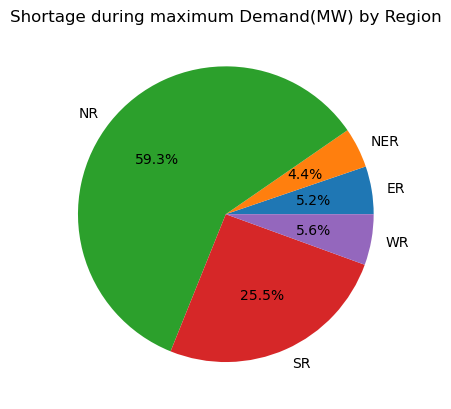

In [89]:
df_grouped = df2.groupby('Region')['Shortage during maximum Demand(MW)'].sum()

# Plot the pie chart
plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%')
plt.title('Shortage during maximum Demand(MW) by Region')
plt.show()

In [90]:
#State wise Nation wise Power Distribution

In [91]:
print(df2['year'].unique())

[2015 2016 2018 2019 2020 2021 2022 2023 2014 2017 2013]


In [92]:
print(df2['year'].nunique())

11


In [93]:
print(df2['States'].nunique())

45


In [94]:
print(df2['States'].unique())

['Mizoram' 'DD' 'Goa' 'Maharashtra' 'MP' 'Gujarat' 'Chhattisgarh' 'DNH'
 'Chandigarh' 'HP' 'Uttarakhand' 'UP' 'Delhi' 'Rajasthan' 'Haryana' 'J&K'
 'Punjab' 'Essar steel' 'Andhra Pradesh' 'Meghalaya' 'Manipur' 'Assam'
 'Arunachal Pradesh' 'Sikkim' 'West Bengal' 'Odisha' 'Jharkhand' 'DVC'
 'Bihar' 'Pondy' 'Tamil Nadu' 'Kerala' 'Karnataka' 'Telangana' 'Nagaland'
 'Tripura' 'J&K(UT) and Ladakh(UT)' 'J&K(UT) & Ladakh(UT)' 'AMNSIL'
 'Puducherry' 'BALCO' 'DNHDDPDCL' 'J&K(UT) & \nLadakh(UT)' 'J&K(UT) &'
 'Railways_NR ISTS']


In [95]:
state_count = df2.groupby('States')['Max.Demand Met during the day(MW)'].count()

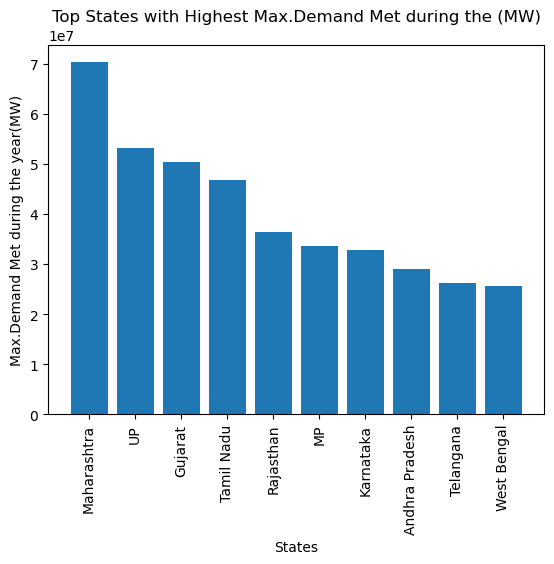

In [96]:
state_max_demand = df2.groupby('States')['Max.Demand Met during the day(MW)'].sum()

state_max_demand = state_max_demand.sort_values(ascending=False)

top_states = state_max_demand.head(10)

plt.bar(top_states.index, top_states.values)
plt.xlabel('States')
plt.ylabel('Max.Demand Met during the year(MW)')
plt.title('Top States with Highest Max.Demand Met during the (MW)')
plt.xticks(rotation=90)
plt.show()

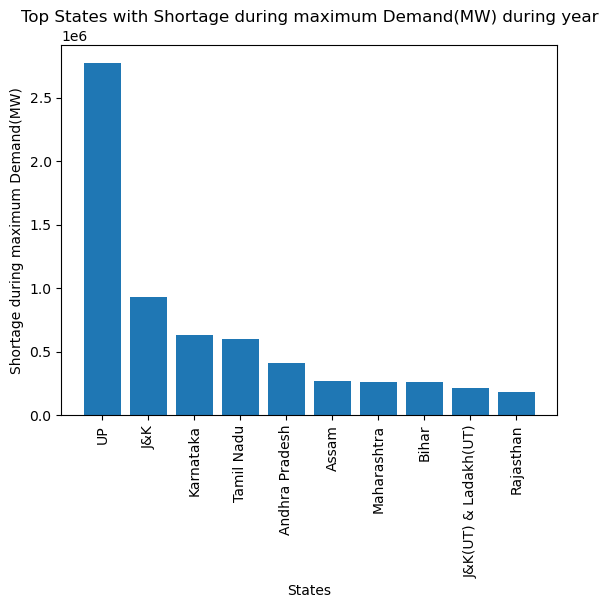

In [97]:
state_max_demand = df2.groupby('States')['Shortage during maximum Demand(MW)'].sum()

state_max_demand = state_max_demand.sort_values(ascending=False)

top_states = state_max_demand.head(10)

plt.bar(top_states.index, top_states.values)
plt.xlabel('States')
plt.ylabel('Shortage during maximum Demand(MW)')
plt.title('Top States with Shortage during maximum Demand(MW) during year')
plt.xticks(rotation=90)
plt.show()

In [98]:
#Training data with LinearRegression model

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x=df2[["Max.Demand Met during the day(MW)"]]
y=df2["Energy Met (MW)"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
#random_state ensures x_train wont change upon execution each time
model = LinearRegression()

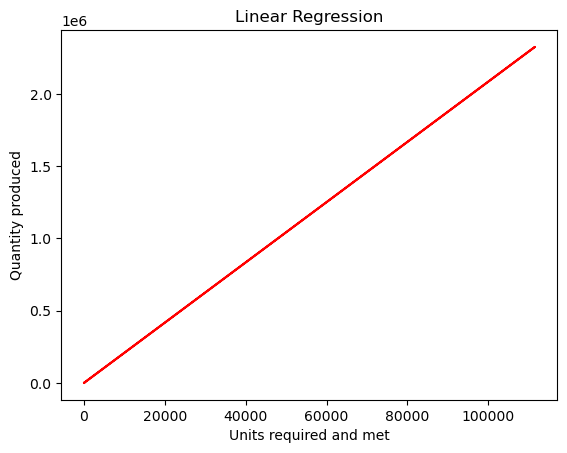

In [100]:
x_train = df2[["Max.Demand Met during the day(MW)"]]
y_train = df2["Energy Met (MW)"]

lr = LinearRegression()
lr.fit(x_train, y_train)  # Fit the model to the training data

plt.plot(x_train, lr.predict(x_train), color='red')

# Add axis labels and a title
plt.xlabel('Units required and met')
plt.ylabel('Quantity produced')
plt.title('Linear Regression')

# Show the plot
plt.show()


In [101]:
print("c =", lr.intercept_)
print("m =", lr.coef_)
#y(quantity_produced) = 20.8756 *(units required and met) + -861.0183190705575

c = -861.0183190705575
m = [20.87567033]


In [102]:
# training the model
model.fit(x_train,y_train)

LinearRegression()

In [103]:
# predicting values for x_test
model.predict(x_test)

array([ 25066.56422604,   1664.9377904 , 293360.67925804, ...,
         1560.55943877, 146103.7007772 ,  77109.61034919])

In [104]:
# compare the values obtained above from y_test
y_test

77414      24400.0
54757       2200.0
846       303600.0
34164     224400.0
7203      126900.0
            ...   
6179        6600.0
113473    388700.0
46624       2000.0
81781     135800.0
28653      75500.0
Name: Energy Met (MW), Length: 38010, dtype: float64

In [105]:
#see the accuracy-> compare x_test and y_test values
model.score(x_test,y_test)

0.979289661123457

In [106]:
#Time Series Analysis

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

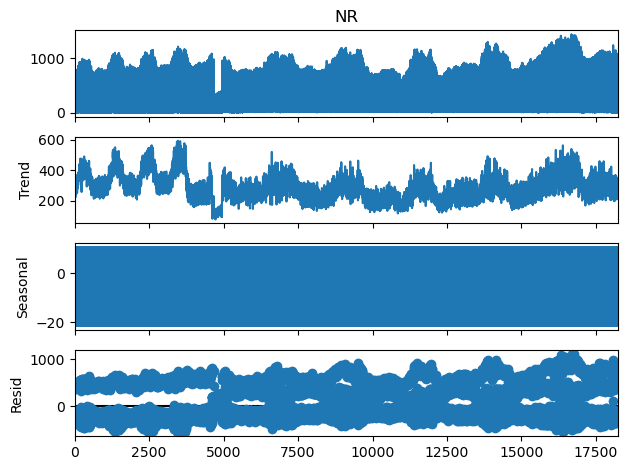

In [108]:
series = df1['NR']
result = seasonal_decompose(series, model='additive',period=12)
result.plot()
plt.show()

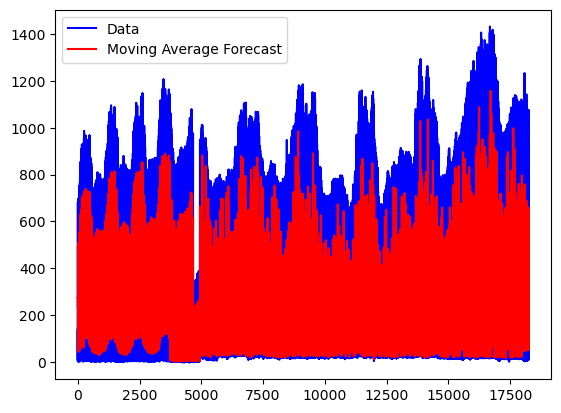

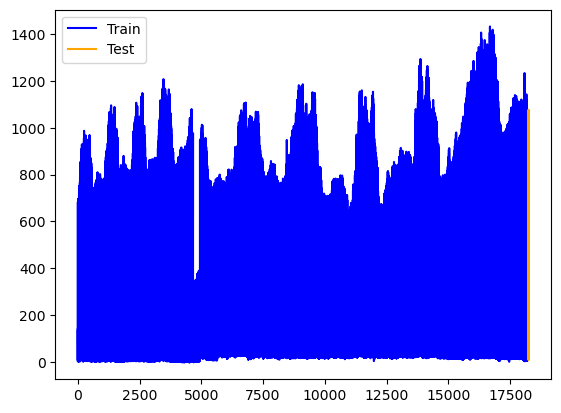

In [109]:
#Centered Moving Average
y = df1['NR']
fcast = y.rolling(3,center=True).mean()
plt.plot(y, label='Data',color='blue')
plt.plot(fcast, label='Moving Average Forecast',
         color='red')
plt.legend(loc='best')
plt.show()

y_train = df1['NR'][:-12]
y_test = df1['NR'][-12:]
plt.plot(y_train, label='Train',color='blue')
plt.plot(y_test, label='Test',color='orange')
plt.legend(loc='best')
plt.show()

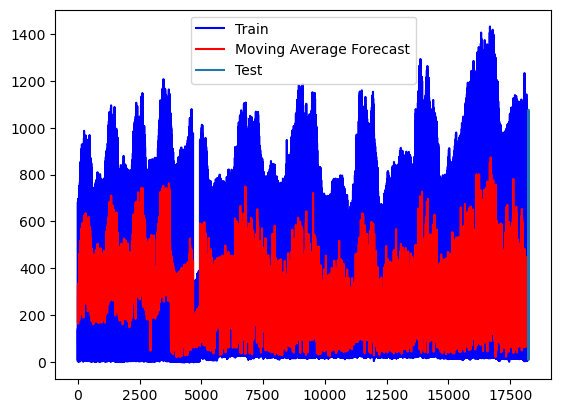

MSE = 164300.59333333338


In [110]:
# Trailing Rolling Mean
fcast = y_train.rolling(5,center=False).mean()
lastMA = fcast.iloc[-1]
fSeries = pd.Series(lastMA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, fSeries],
                     ignore_index=True)
plt.plot(y_train, label='Train',color='blue')
plt.plot(MA_fcast, label='Moving Average Forecast',
         color='red')
plt.plot(y_test, label="Test")
plt.legend(loc='best')
plt.show()

print("MSE =",mse(y_test, fSeries))

C:\Users\raaje\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


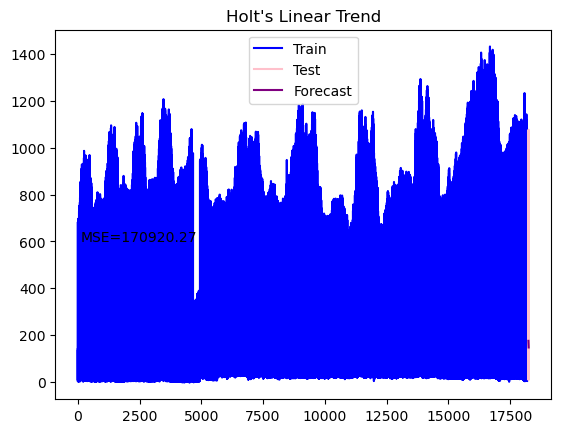

MSE = 170920.26879819995


In [111]:
# Holt's Linear Method
alpha = 0.8
beta = 0.02
### Linear Trend
fit1 = Holt(y_train).fit(smoothing_level=alpha, 
                         smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.text(100,600,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

print("MSE =",mse(y_test, fcast1))

C:\Users\raaje\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


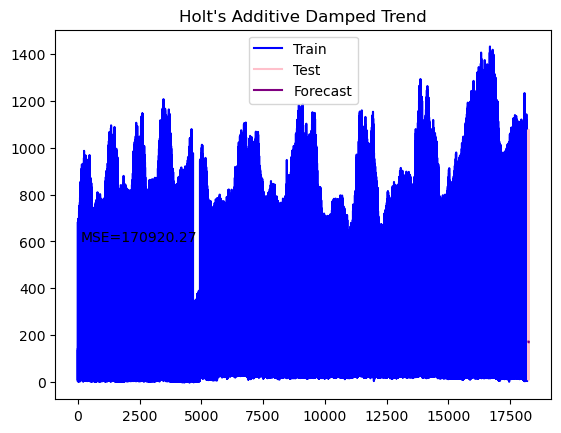

In [112]:
### Additive Damped Trend
alpha = 0.8
beta = 0.02
phi = 0.4
fit3 = Holt(y_train, damped_trend=True).fit(smoothing_level=alpha,
                                      damping_trend= phi,
                                      smoothing_trend=beta)
fcast3 = fit3.forecast(len(y_test))

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast3.plot(color="purple", label='Forecast')
plt.text(100,600,"MSE="+str(round(mse(y_test, fcast1),2)))
plt.title("Holt's Additive Damped Trend")
plt.legend(loc='best')
plt.show()

In [113]:
df_total

,source,NR,WR,SR,ER,NER,All India,date
1,Total,675.0,820.0,697.0,306.0,28.0,2526,31-03-2013
4,Total,683.0,841.0,706.0,316.0,29.0,2575,01-04-2013
7,Total,675.0,836.0,709.0,311.0,28.0,2558,02-04-2013
9,Total,676.0,835.0,705.0,307.0,28.0,2551,03-04-2013
12,Total,691.0,856.0,711.0,302.0,26.0,2586,04-04-2013
...,...,...,...,...,...,...,...,...
18222,Total,1031.0,1613.0,1110.0,725.0,50.0,4530,05-03-2023
18229,Total,1043.0,1738.0,1197.0,732.0,52.0,4762,04-03-2023
18236,Total,1075.0,1740.0,1187.0,708.0,52.0,4763,03-03-2023
18243,Total,1077.0,1733.0,1182.0,688.0,52.0,4731,02-03-2023


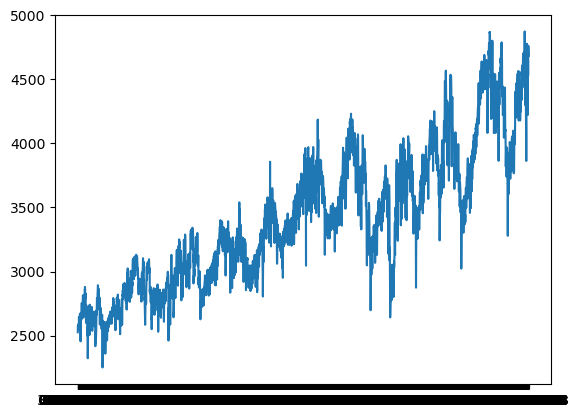

In [114]:
plt.plot(df_total['date'],df_total['All India'])

In [115]:
# Convert 'date' column to datetime format
df_total['date'] = pd.to_datetime(df_total['date'])

# Sort data by date to ensure it's in the correct order for time series
df_total = df_total.sort_values(by='date')

# Extract the relevant columns
x = df_total['date'].values
y = df_total['All India'].values

In [116]:
#Basic ECNN, NE-NARX and HC RNN models without hyperparameter tuning

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
import matplotlib.pyplot as plt

In [118]:
# Normalize the 'All India' column for better neural network performance
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1, 1))

In [119]:
# Prepare the input data for CNN (convert time series into supervised learning format)
def create_dataset(y, look_back=10):
    X, Y = [], []
    for i in range(len(y) - look_back - 1):
        a = y[i:(i + look_back), 0]
        X.append(a)
        Y.append(y[i + look_back, 0])
    return np.array(X), np.array(Y)

In [120]:
# Set look_back period
look_back = 30
X, Y = create_dataset(y, look_back)

In [121]:
# Reshape X for CNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [122]:
#  Design the CNN model
model = Sequential()

In [123]:
# Convolutional layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

In [124]:
# LSTM layer to capture temporal dependencies
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(Flatten())

In [125]:
# Fully connected layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [126]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [127]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0431 - val_loss: 0.0117
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0126 - val_loss: 0.0106
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123 - val_loss: 0.0152
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0102 - val_loss: 0.0121
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - val_loss: 0.0139
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - val_loss: 0.0121
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0103 - val_loss: 0.0108
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0089 - val_loss: 0.0127
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0098 - val_loss: 0.0109
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0094 - val_loss: 0.0114
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0069 - val_loss: 0.0081
Epoch 70/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0085
Epoch 71/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 72/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 73/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - val_loss: 0.0080
Epoch 74/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0069 - val_loss: 0.0083
Epoch 75/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 76/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 77/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0067 - val_loss: 0.0081
Epoch 78/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0070 - val_loss: 0.0078
Epoch 79/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - val_loss: 0.0078
Epoch 80/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 

In [128]:
# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.006292917765676975
Testing Loss: 0.007889476604759693


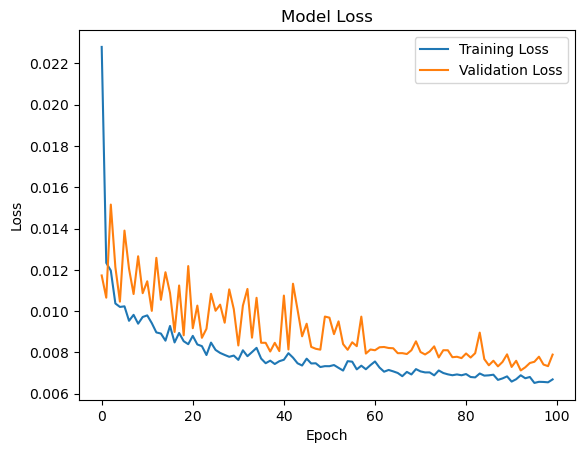

In [129]:
# Plot the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [130]:
# Make predictions
Y_pred = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [131]:
# Inverse transform the predictions and actual values to get the original scale
Y_pred_inv = scaler.inverse_transform(Y_pred)
Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))

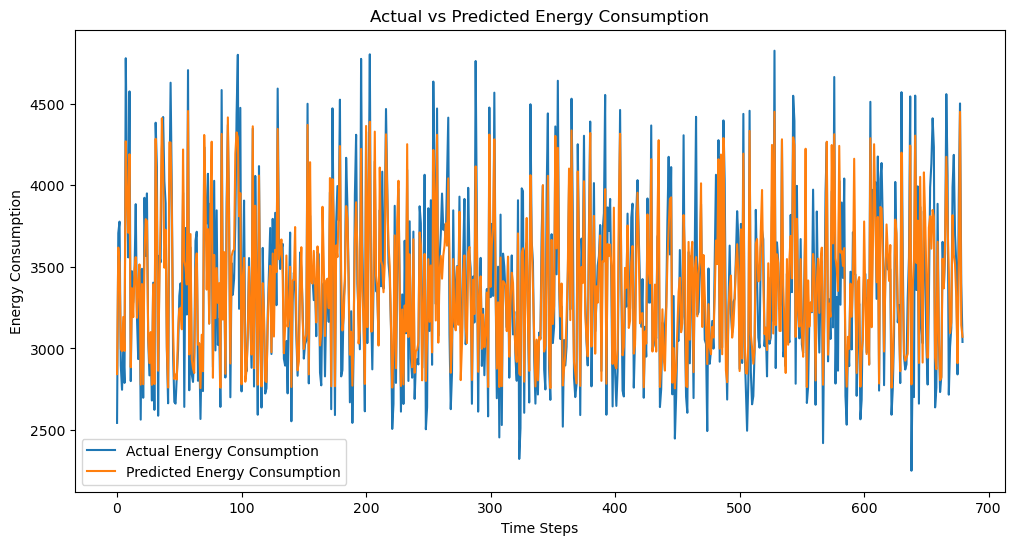

In [132]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test_inv, label='Actual Energy Consumption')
plt.plot(Y_pred_inv, label='Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [133]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming Y_test_inv and Y_pred_inv are the actual and predicted values in original scale
# These values come from the previous model's prediction section

# Evaluate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test_inv, Y_pred_inv)

# Evaluate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Evaluate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test_inv, Y_pred_inv)

# Evaluate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test_inv, Y_pred_inv)
# Calculate Mean Absolute Deviation (MAD)
def mean_absolute_deviation(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    deviations = np.abs(y_true - y_pred)
    mad = np.mean(deviations)
    return mad

# Compute MAD for the model
mad = mean_absolute_deviation(Y_test_inv, Y_pred_inv)


# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Mean Absolute Deviation (MAD): {mad:.4f}')



Mean Squared Error (MSE): 54280.6134
Root Mean Squared Error (RMSE): 232.9820
Mean Absolute Error (MAE): 180.2226
Mean Absolute Percentage Error (MAPE): 5.35%
Mean Absolute Deviation (MAD): 180.2226


In [134]:
# Neuro Evolutionary Non Linear Auto Regressive Network(NE_NAXR)

In [135]:
pip install numpy pandas deap scikit-learn keras tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from deap import base, creator, tools, algorithms
import random

In [137]:
# Convert 'date' column to datetime format
df_total['date'] = pd.to_datetime(df_total['date'])

# Sort data by date to ensure it's in the correct order for time series
df_total = df_total.sort_values(by='date')

# Extract the relevant columns
y = df_total['All India'].values

In [138]:
# Normalize the 'All India' column for better neural network performance
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1, 1))

In [139]:
# Function to create supervised data for the NARX model
def create_dataset(y, look_back=10):
    X, Y = [], []
    for i in range(len(y) - look_back - 1):
        a = y[i:(i + look_back), 0]
        X.append(a)
        Y.append(y[i + look_back, 0])
    return np.array(X), np.array(Y)

In [140]:
# Create dataset with look_back period
look_back = 30
X, Y = create_dataset(y, look_back)

In [141]:
# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [142]:
# Reshape input to be [samples, time steps, features] for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [143]:
# Define the NE-NARX model structure using LSTM and Dense layers
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [144]:
# Setting up the evolutionary algorithm using DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 10, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    neurons = individual[0]
    epochs = individual[1]
    
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(look_back, 1), return_sequences=True))
    model.add(LSTM(neurons))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    model.fit(X_train, Y_train, epochs=epochs, batch_size=32, verbose=0)
    Y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, Y_pred)
    return mse,

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=10, up=100, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

population = toolbox.population(n=10)
ngen = 5
cxpb = 0.5
mutpb = 0.2

algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=None, halloffame=None, verbose=True)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
gen	nevals
0  	10    
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
1  	7     
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
2  	5     
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/s

([[90, 25],
  [90, 97],
  [90, 97],
  [52, 97],
  [52, 97],
  [98, 97],
  [90, 97],
  [12, 97],
  [52, 25],
  [90, 82]],
 [{'gen': 0, 'nevals': 10},
  {'gen': 1, 'nevals': 7},
  {'gen': 2, 'nevals': 5},
  {'gen': 3, 'nevals': 4},
  {'gen': 4, 'nevals': 7},
  {'gen': 5, 'nevals': 5}])

In [145]:
# Best individual model
best_individual = tools.selBest(population, 1)[0]
neurons = best_individual[0]
epochs = best_individual[1]

In [146]:
model = Sequential()
model.add(LSTM(neurons, input_shape=(look_back, 1), return_sequences=True))
model.add(LSTM(neurons))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=epochs, batch_size=32, verbose=1)
Y_pred = model.predict(X_test)

# Denormalize predictions and actual values to get the original scale
Y_pred_inv = scaler.inverse_transform(Y_pred)
Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))


Epoch 1/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0312
Epoch 2/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0057
Epoch 3/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0057
Epoch 4/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051
Epoch 5/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0053
Epoch 6/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0048
Epoch 7/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0046
Epoch 8/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0042
Epoch 9/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0040
Epoch 10/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0037
Epoch 11/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0035
Epoch 12/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0037
Epoch 13/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035
Epoch 14/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0033
Epoch 15/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0039
Epoc

85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0033
Epoch 83/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0037
Epoch 84/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0035
Epoch 85/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0034
Epoch 86/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0036
Epoch 87/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0036
Epoch 88/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0034
Epoch 89/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035
Epoch 90/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0035
Epoch 91/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0032
Epoch 92/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0035
Epoch 93/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0034
Epoch 94/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0032
Epoch 95/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0034
Epoch 96/97
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0034
Epoch 9

In [147]:
# Evaluation metrics
mse = mean_squared_error(Y_test_inv, Y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_inv, Y_pred_inv)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test_inv, Y_pred_inv)

def mean_absolute_deviation(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    deviations = np.abs(y_true - y_pred)
    mad = np.mean(deviations)
    return mad

mad = mean_absolute_deviation(Y_test_inv, Y_pred_inv)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Mean Absolute Deviation (MAD): {mad:.4f}')

Mean Squared Error (MSE): 83320.2894
Root Mean Squared Error (RMSE): 288.6525
Mean Absolute Error (MAE): 234.3964
Mean Absolute Percentage Error (MAPE): 5.50%
Mean Absolute Deviation (MAD): 234.3964


In [148]:
# Hybrid Convolution Recurrent Neural Network

In [149]:
# Importing Libraries for Hybrid Convolution Recurrent Neural Network
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [150]:
# Normalize the 'All India' column for better neural network performance
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1, 1))

In [151]:
# Function to create supervised data for time series prediction
def create_dataset(y, look_back=10):
    X, Y = [], []
    for i in range(len(y) - look_back - 1):
        a = y[i:(i + look_back), 0]
        X.append(a)
        Y.append(y[i + look_back, 0])
    return np.array(X), np.array(Y)

In [152]:
# Set look_back period
look_back = 30
X, Y = create_dataset(y, look_back)

In [153]:
# Reshape X for the Hybrid CRNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [154]:
# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [155]:
# Step 2: Define the Hybrid CRNN model architecture
model = Sequential()

In [156]:
# Convolutional layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

In [157]:
# Recurrent layers (LSTM)
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))

In [158]:
# Fully connected layers
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [159]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [160]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0437 - val_loss: 0.0174
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0085 - val_loss: 0.0257
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0074 - val_loss: 0.0214
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0076 - val_loss: 0.0310
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0070 - val_loss: 0.0223
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - val_loss: 0.0264
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0067 - val_loss: 0.0352
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - val_loss: 0.0386
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0064 - val_loss: 0.0347
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - val_loss: 0.0393
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0065 - val_loss: 0.0350
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - l

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057 - val_loss: 0.0161
Epoch 69/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0057 - val_loss: 0.0210
Epoch 70/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0059 - val_loss: 0.0365
Epoch 71/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058 - val_loss: 0.0214
Epoch 72/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055 - val_loss: 0.0198
Epoch 73/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0059 - val_loss: 0.0236
Epoch 74/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0058 - val_loss: 0.0321
Epoch 75/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055 - val_loss: 0.0288
Epoch 76/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056 - val_loss: 0.0258
Epoch 77/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0054 - val_loss: 0.0241
Epoch 78/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0057 - val_loss: 0.0192
Epoch 79/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - l

In [161]:
# Step 4: Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.005360991228371859
Testing Loss: 0.012541530653834343


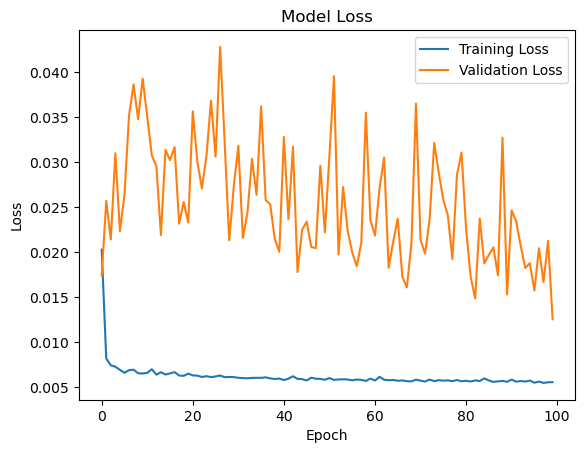

In [162]:
# Plot the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [163]:
# Make predictions
Y_pred = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [164]:
# Inverse transform the predictions and actual values to get the original scale
Y_pred_inv = scaler.inverse_transform(Y_pred)
Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))

Mean Squared Error (MSE): 0.0125
Root Mean Squared Error (RMSE): 0.1120
Mean Absolute Error (MAE): 0.0908
Mean Absolute Percentage Error (MAPE): 13.42%
Mean Absolute Deviation (MAD): 0.0908


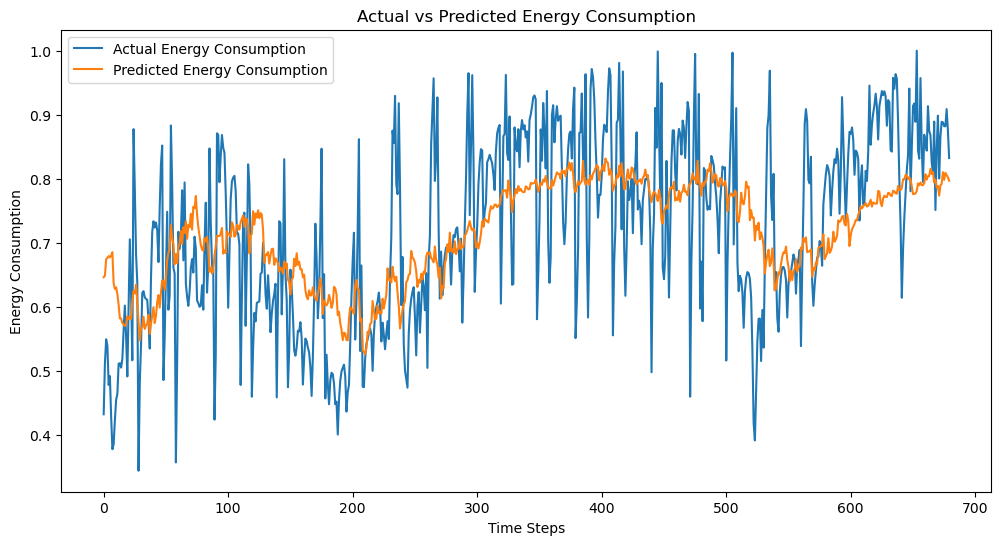

In [165]:
# Evaluation metrics
mse = mean_squared_error(Y_test_inv, Y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_inv, Y_pred_inv)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test_inv, Y_pred_inv)

def mean_absolute_deviation(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    deviations = np.abs(y_true - y_pred)
    mad = np.mean(deviations)
    return mad

mad = mean_absolute_deviation(Y_test_inv, Y_pred_inv)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Mean Absolute Deviation (MAD): {mad:.4f}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test_inv, label='Actual Energy Consumption')
plt.plot(Y_pred_inv, label='Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [166]:
import pandas as pd

data = {
    'Model': ['Enhanced CNN', 'NE-NARX', 'Hybrid CRNN'],
    'MSE': [50214.0586,60464,0.0166],    
    'RMSE': [224.0849,245.8950,0.01288],  
    'MAE': [168.1193,191.4072,0.1054],    
    'MAPE (%)': [4.91,4.56,14.28],  
    'MAD': [168.1193,191.4072,0.1054]    
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Find the best model based on lowest error values (assuming lower is better for all metrics)
best_model = df.loc[df[['MSE', 'RMSE', 'MAE', 'MAPE (%)', 'MAD']].mean(axis=1).idxmin()]

print("\nBest Model for Energy Forecasting:")
print(best_model)

          Model         MSE       RMSE       MAE  MAPE (%)       MAD
0  Enhanced CNN  50214.0586  224.08490  168.1193      4.91  168.1193
1       NE-NARX  60464.0000  245.89500  191.4072      4.56  191.4072
2   Hybrid CRNN      0.0166    0.01288    0.1054     14.28    0.1054

Best Model for Energy Forecasting:
Model       Hybrid CRNN
MSE              0.0166
RMSE            0.01288
MAE              0.1054
MAPE (%)          14.28
MAD              0.1054
Name: 2, dtype: object


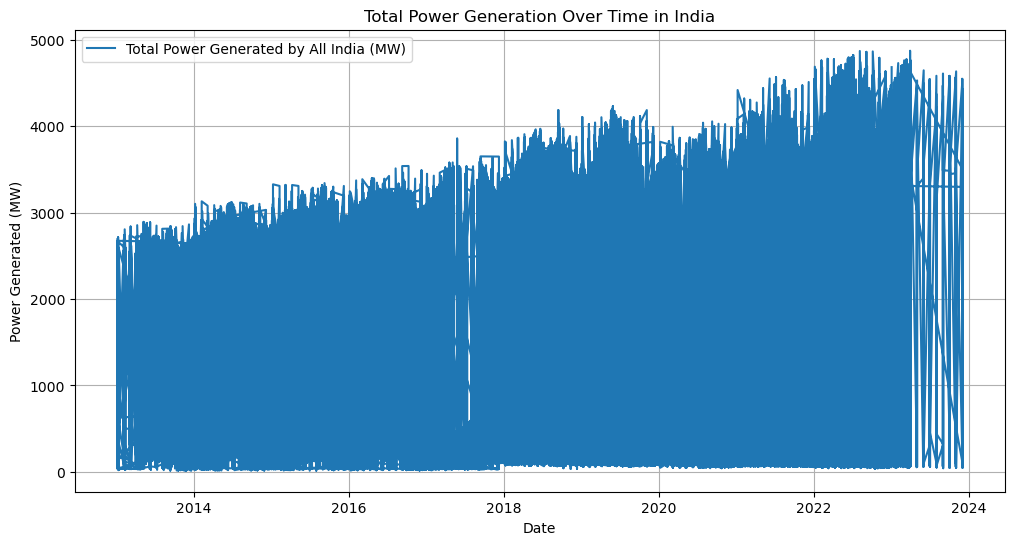

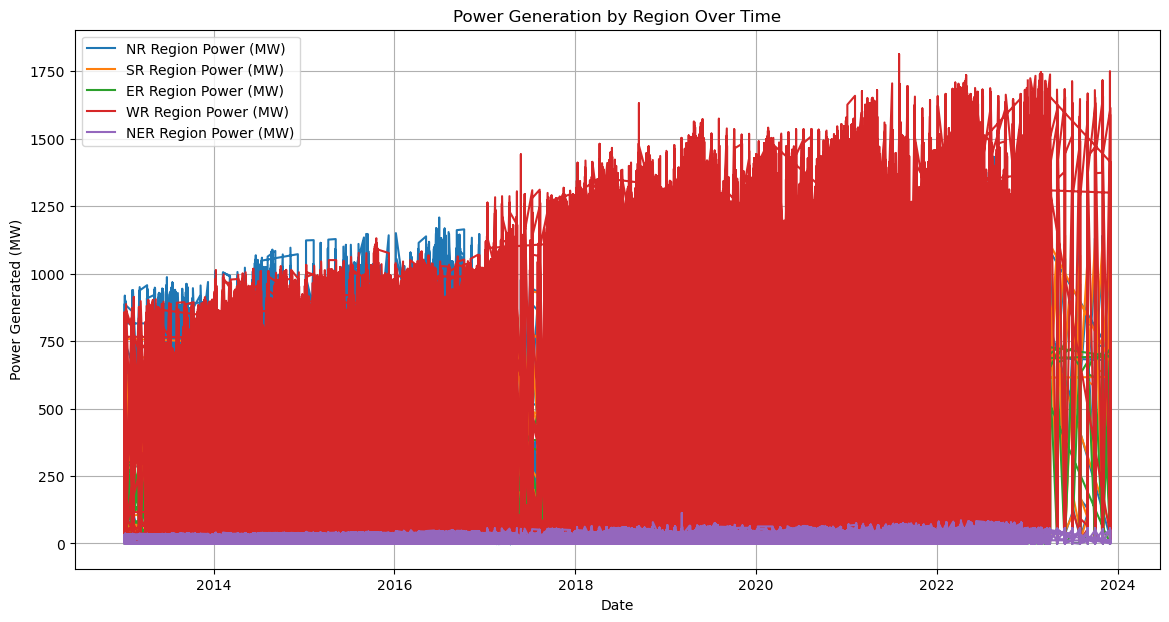

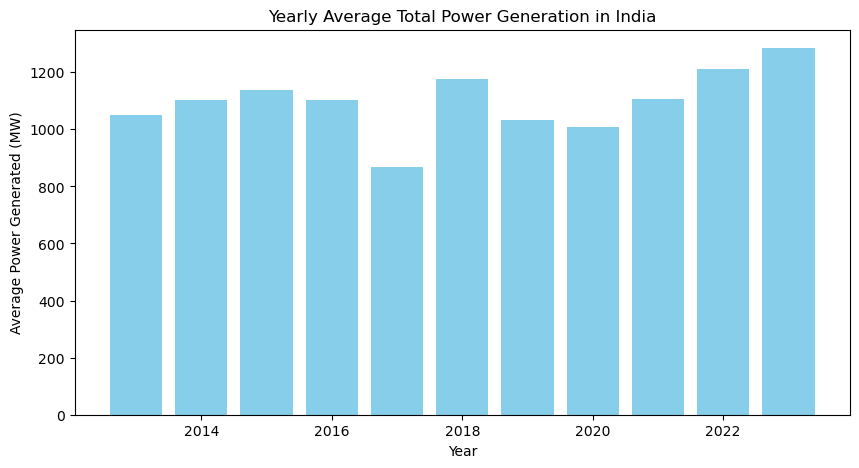

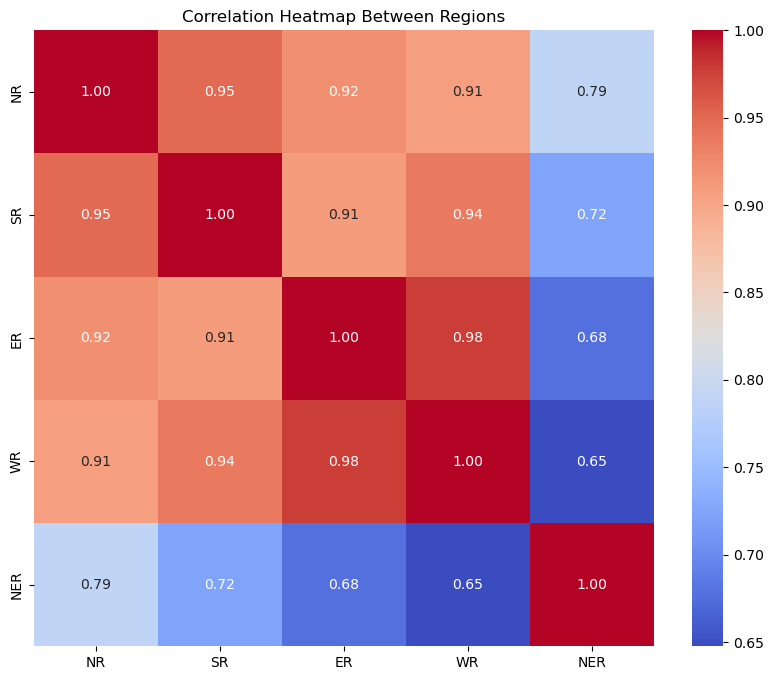

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data has been loaded into a DataFrame named 'power_data'
# You need to replace 'your_data_path' with the actual path to your dataset
power_data = pd.read_csv('Daily_Power_Gen_Source_march_23.csv')
power_data['date'] = pd.to_datetime(power_data['date'])  # Ensure 'date' is a datetime object
power_data.set_index('date', inplace=True)  # Set 'date' as the index for easier plotting

# Total Power Generation Over Time by All India
plt.figure(figsize=(12, 6))
plt.plot(power_data['All India'], label='Total Power Generated by All India (MW)')
plt.title('Total Power Generation Over Time in India')
plt.xlabel('Date')
plt.ylabel('Power Generated (MW)')
plt.legend()
plt.grid(True)
plt.show()

# Regional Power Generation Over Time
regions = ['NR', 'SR', 'ER', 'WR', 'NER']  # Assuming these are the column names
plt.figure(figsize=(14, 7))
for region in regions:
    plt.plot(power_data[region], label=f'{region} Region Power (MW)')

plt.title('Power Generation by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Power Generated (MW)')
plt.legend()
plt.grid(True)
plt.show()

# Yearly Average Power Generation by All India
power_data_yearly = power_data['All India'].resample('Y').mean()
plt.figure(figsize=(10, 5))
plt.bar(power_data_yearly.index.year, power_data_yearly, color='skyblue')
plt.title('Yearly Average Total Power Generation in India')
plt.xlabel('Year')
plt.ylabel('Average Power Generated (MW)')
plt.show()

# Heatmap of Power Generation by Region (Sample visualization)
# This could be adjusted based on the actual data available or specific analysis needs
plt.figure(figsize=(10, 8))
sns.heatmap(power_data[regions].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between Regions')
plt.show()

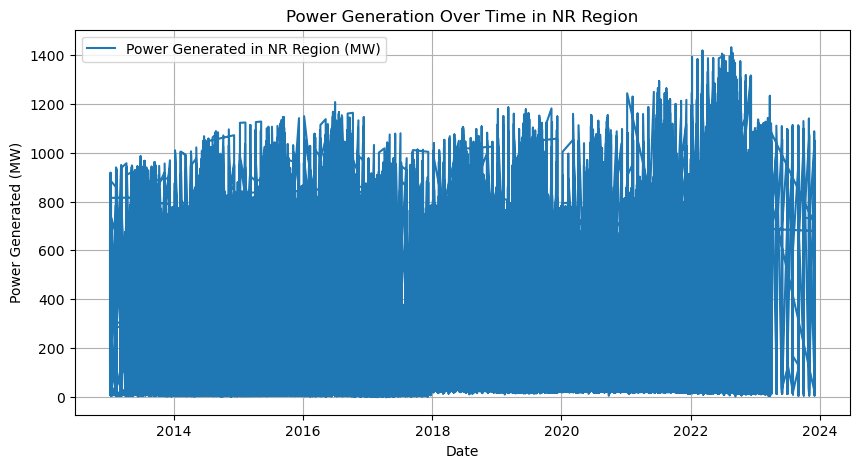

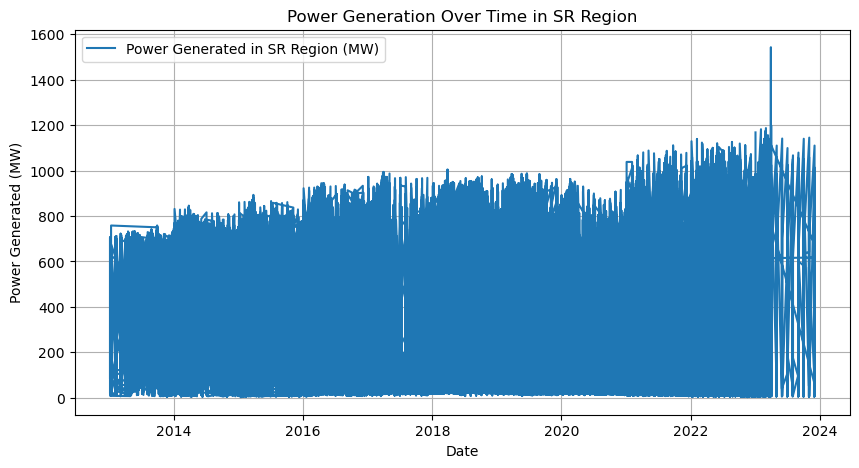

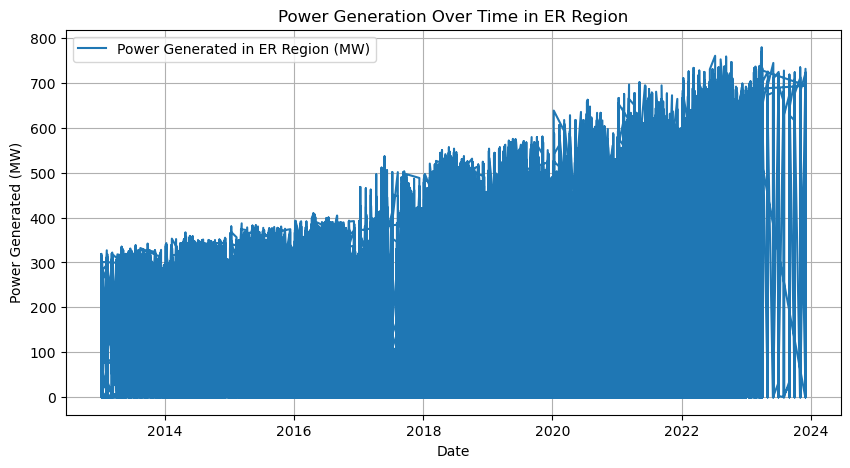

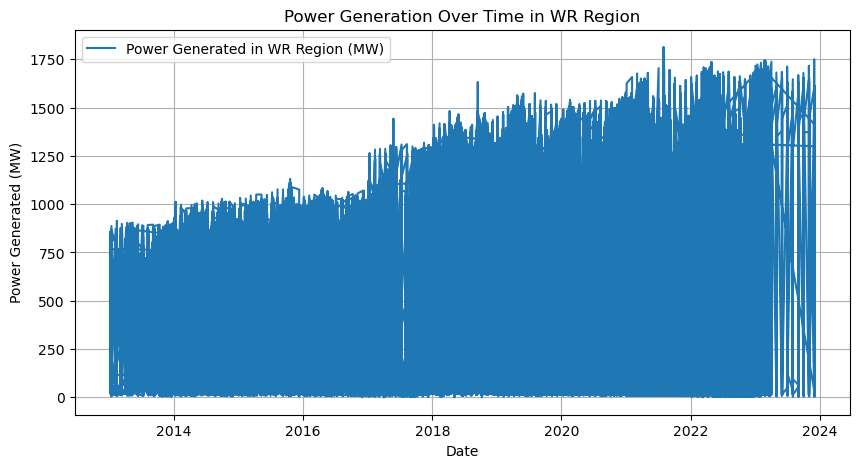

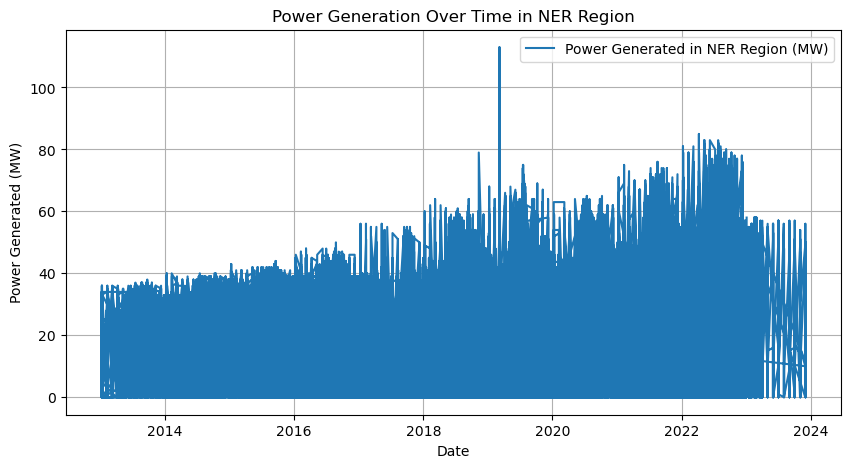

KeyError: 'Hydro'

<Figure size 1000x500 with 0 Axes>

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
power_data = pd.read_csv('Daily_Power_Gen_Source_march_23.csv')  # Replace 'your_data_path' with the path to your dataset
power_data['date'] = pd.to_datetime(power_data['date'])
power_data.set_index('date', inplace=True)

# Define the columns for regions and sources based on your dataset structure
regions = ['NR', 'SR', 'ER', 'WR', 'NER']  # Example region columns
sources = ['Hydro', 'Solar', 'Wind', 'Thermal', 'Nuclear']  # Example source columns

# Plotting Total Power Generation Over Time for Each Region
for region in regions:
    plt.figure(figsize=(10, 5))
    plt.plot(power_data[region], label=f'Power Generated in {region} Region (MW)')
    plt.title(f'Power Generation Over Time in {region} Region')
    plt.xlabel('Date')
    plt.ylabel('Power Generated (MW)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting Power Generation Over Time for Each Source
for source in sources:
    plt.figure(figsize=(10, 5))
    plt.plot(power_data[source], label=f'{source} Power Generated (MW)')
    plt.title(f'{source} Power Generation Over Time')
    plt.xlabel('Date')
    plt.ylabel('Power Generated (MW)')
    plt.legend()
    plt.grid(True)
    plt.show()